#### Breast Cancer Classification
This Python script is designed to classify breast cancer tumors as either benign (B) or malignant (M) based on various features extracted from diagnostic images. The dataset used in this script is Breast-Cancer-Data.csv.

#### Problem Description
The problem addressed in this script is that of a classification task. Given diagnostic features extracted from breast cancer tumor images, the goal is to classify tumors into two categories: benign (B) or malignant (M).


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [125]:
dataset = pd.read_csv("Breast-Cancer-Data.csv")

In [126]:
# Display the shape and first 5 rows of the dataset
print("Dataset Shape:", dataset.shape)
print("\nFirst 5 Rows of the Dataset:\n", dataset.head(5))

Dataset Shape: (569, 33)

First 5 Rows of the Dataset:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...

In [127]:
# Map 'B' to 0 and 'M' to 1 in the 'diagnosis' column
dataset["diagnosis"] = dataset["diagnosis"].map({"B": 0, "M": 1}).astype(int)

# Segregate the dataset into X (Input/Independent Variable) & Y (Output/Dependent Variable)
X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values

In [128]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0
)

In [129]:
# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [144]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=0),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(C=1, gamma="scale", kernel="linear"),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "Naive Bayes": GaussianNB(),
}

In [145]:
# Evaluate each classifier using cross-validation
classifier_scores = {}
for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    classifier_scores[clf_name] = scores.mean()
    print(f"{clf_name} Cross-Validation Accuracy: {scores.mean()}")

Logistic Regression Cross-Validation Accuracy: 0.9812038303693571
k-Nearest Neighbors Cross-Validation Accuracy: 0.9624897400820794
Support Vector Machine Cross-Validation Accuracy: 0.9835567715458277
Decision Tree Cross-Validation Accuracy: 0.9154856361149111
Random Forest Cross-Validation Accuracy: 0.9436935704514365
Gradient Boosting Cross-Validation Accuracy: 0.955403556771546
Naive Bayes Cross-Validation Accuracy: 0.9460465116279069


In [146]:
# Choose the best-performing classifier
best_classifier_name = max(
    classifiers,
    key=lambda k: cross_val_score(
        classifiers[k], X_train, y_train, cv=5, scoring="accuracy"
    ).mean(),
)
best_classifier = classifiers[best_classifier_name]
best_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [147]:
# Make predictions on the test set
y_pred = best_classifier.predict(X_test)

In [148]:
# Evaluate the performance of the best classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"\nBest Classifier: {best_classifier_name}")
print(f"Accuracy of the Model: {accuracy * 100}%")


Best Classifier: Support Vector Machine
Accuracy of the Model: 97.2027972027972%


In [149]:
# Display confusion matrix and classification report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))


Confusion Matrix:
[[88  2]
 [ 2 51]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98        90
   Malignant       0.96      0.96      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



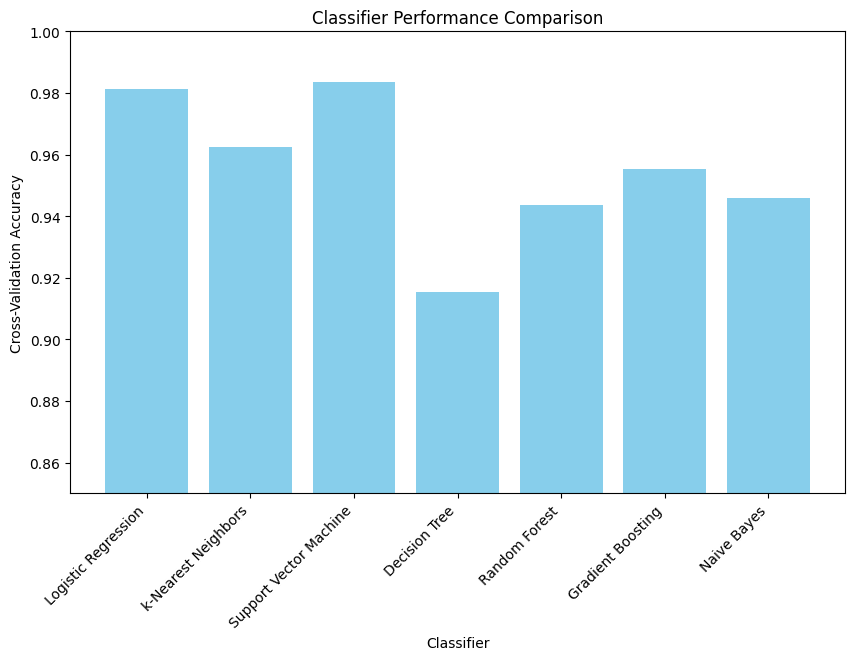

In [150]:
# Plot classifier performance
plt.figure(figsize=(10, 6))
plt.bar(
    classifier_scores.keys(),
    classifier_scores.values(),
    color="skyblue",
)
plt.xlabel("Classifier")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Classifier Performance Comparison")
plt.xticks(rotation=45, ha="right")
plt.ylim(0.85, 1.0)
plt.show()

Future Work: Feature Selection

Potential techniques include:
- Univariate feature selection
- Recursive feature elimination
- Feature importance ranking using tree-based models
- PCA for dimensionality reduction
- Feature selection using SelectFromModel